In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__61_COMPLETE.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,7,1.5,1,10,0.05,0,2.776316,2.750000,0.000000,0.000000,0.310417,0.0625,0.00000,0.000000,15
1,1,1.5,1,10,0.05,0,2.631579,2.500000,0.000000,0.000000,0.347917,0.0875,0.00000,0.000000,19
2,4,1.5,1,10,0.05,0,2.605263,3.000000,0.000000,0.000000,0.304167,0.0125,0.00000,0.000000,13
3,6,1.5,1,10,0.15,0,2.808824,2.333333,0.029167,0.000000,0.257500,0.1125,0.00000,0.000000,17
4,12,1.5,1,40,0.15,0,1.882353,2.250000,0.037500,0.000000,0.341667,0.0125,0.00000,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,162,5.5,5,40,0.15,86,2.852941,3.166667,0.710870,1.570570,0.649599,22.5375,1.31844,1.077992,1357
14738,162,5.5,5,40,0.15,87,3.250000,3.583333,0.713088,1.567405,0.651124,22.4125,0.99344,0.765492,1367
14739,162,5.5,5,40,0.15,88,2.764706,3.250000,0.713999,1.564557,0.652444,22.3000,0.73094,1.102992,1376
14740,162,5.5,5,40,0.15,89,2.867647,2.833333,0.714271,1.562342,0.653467,22.2125,0.61844,0.627992,1383


In [4]:
df_move=df4.groupby(['percentage-unhappy','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.756990        2.788066      0.187016  0.000000   
                   1         2.744835        2.697016      0.267443  0.338029   
                   2         2.877538        2.792695      0.308323  0.545234   
                   3         2.960141        2.904835      0.331742  0.599039   
                   4         2.894132        2.859568      0.352502  0.673972   
...                               ...             ...           ...       ...   
40                 86        2.770036        2.807613      0.499023  1.156478   
                   87        2.778791        2.844650      0.499701  1.152688   
                   88        2.682119        2.775206      0.500844  1.149930   
                   89        2.673493        2.733539      0.501900  1.147461   
                   90        2.843083        2.872428      0.503150  1.144882   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0      0.344153    51.872685    0.000000    0.000000   
                   1      0.340971    61.142130   -0.125376   -0.157903   
                   2      0.332035    61.355710   -0.131729   -0.148614   
                   3      0.334227    64.572068   -0.136967   -0.152783   
                   4      0.339880    66.204012   -0.121317   -0.145243   
...                            ...          ...         ...         ...   
40                 86     0.477831    42.792438   -0.114281   -0.058184   
                   87     0.479298    42.500926   -0.122460   -0.053400   
                   88     0.480660    42.244907   -0.090979   -0.049233   
                   89     0.481833    42.057562   -0.088818   -0.056024   
                   90     0.483022    41.818519   -0.067213   -0.050468   

                              links  
percentage-unhappy step              
10                 0      70.839506  
                   1      97.925926  
                   2     115.913580  
                   3     129.839506  
                   4     140.592593  
...                             ...  
40                 86    646.716049  
                   87    651.024691  
                   88    655.629630  
                   89    659.790123  
                   90    664.098765  

[182 rows x 9 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.756990        2.788066      0.187016  0.000000   
                   1         2.744835        2.697016      0.267443  0.338029   
                   2         2.877538        2.792695      0.308323  0.545234   
                   3         2.960141        2.904835      0.331742  0.599039   
                   4         2.894132        2.859568      0.352502  0.673972   
...                               ...             ...           ...       ...   
40                 86        2.770036        2.807613      0.499023  1.156478   
                   87        2.778791        2.844650      0.499701  1.152688   
                   88        2.682119        2.775206      0.500844  1.149930   
                   89        2.673493        2.733539      0.501900  1.147461   
                   90        2.843083        2.872428      0.503150  1.144882   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0      0.344153    51.872685    0.000000    0.000000   
                   1      0.340971    61.142130   -0.125376   -0.157903   
                   2      0.332035    61.355710   -0.131729   -0.148614   
                   3      0.334227    64.572068   -0.136967   -0.152783   
                   4      0.339880    66.204012   -0.121317   -0.145243   
...                            ...          ...         ...         ...   
40                 86     0.477831    42.792438   -0.114281   -0.058184   
                   87     0.479298    42.500926   -0.122460   -0.053400   
                   88     0.480660    42.244907   -0.090979   -0.049233   
                   89     0.481833    42.057562   -0.088818   -0.056024   
                   90     0.483022    41.818519   -0.067213   -0.050468   

                              links  total_mood  
percentage-unhappy step                          
10                 0      70.839506    5.545056  
                   1      97.925926    5.441851  
                   2     115.913580    5.670233  
                   3     129.839506    5.864976  
                   4     140.592593    5.753700  
...                             ...         ...  
40                 86    646.716049    5.577649  
                   87    651.024691    5.623441  
                   88    655.629630    5.457325  
                   89    659.790123    5.407032  
                   90    664.098765    5.715511  

[182 rows x 10 columns]

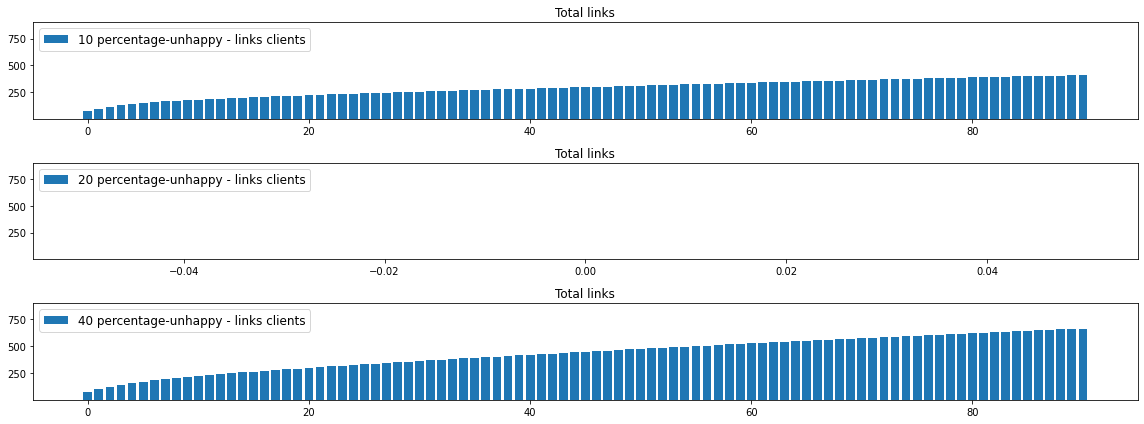

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['links'], label='{} percentage-unhappy - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

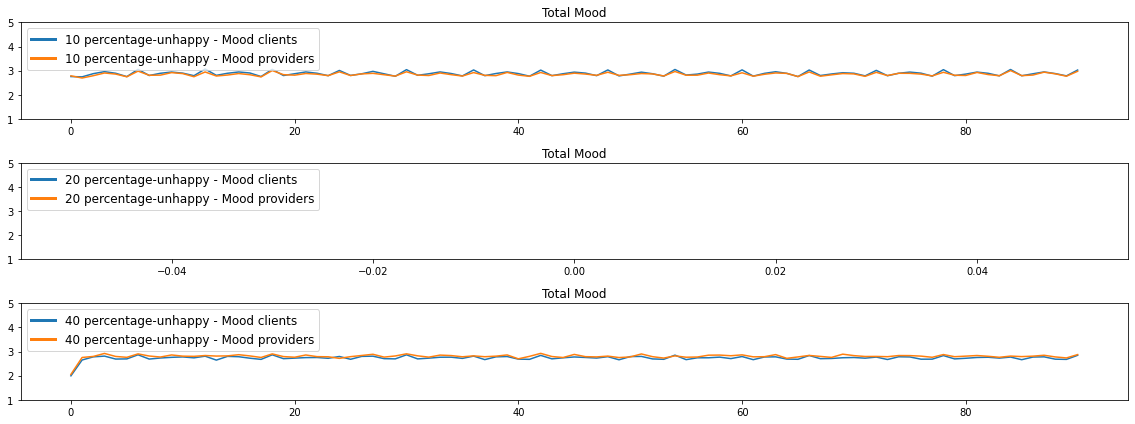

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_clients'], label='{} percentage-unhappy - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_providers'], label='{} percentage-unhappy - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



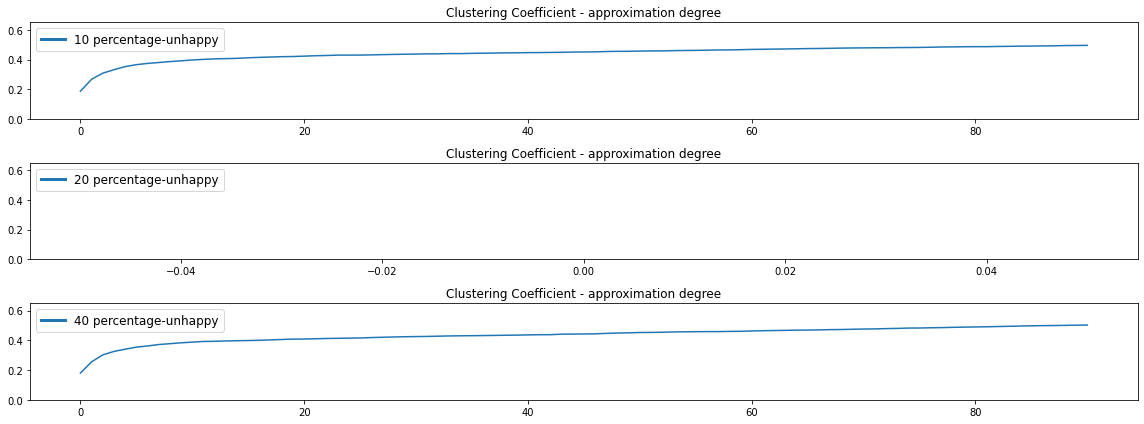

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['cluster_coef'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



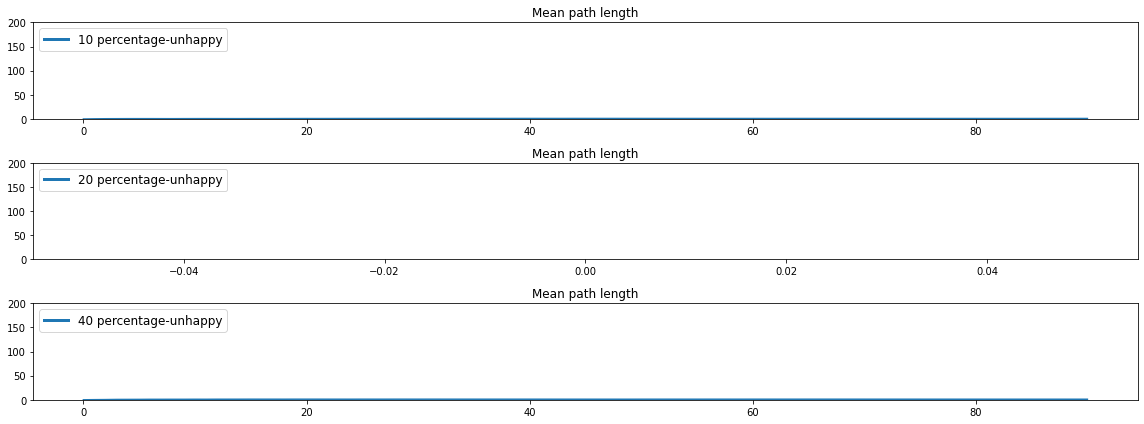

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['paths'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



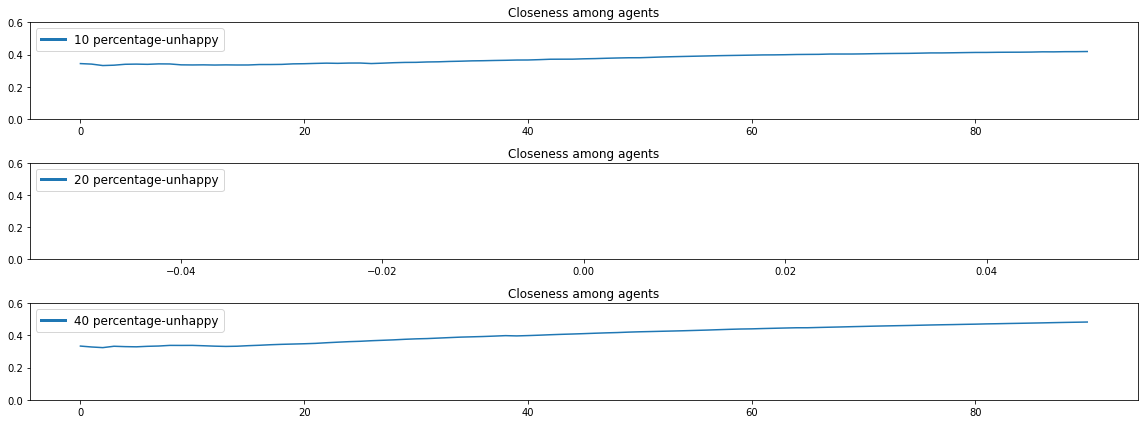

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['closeness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



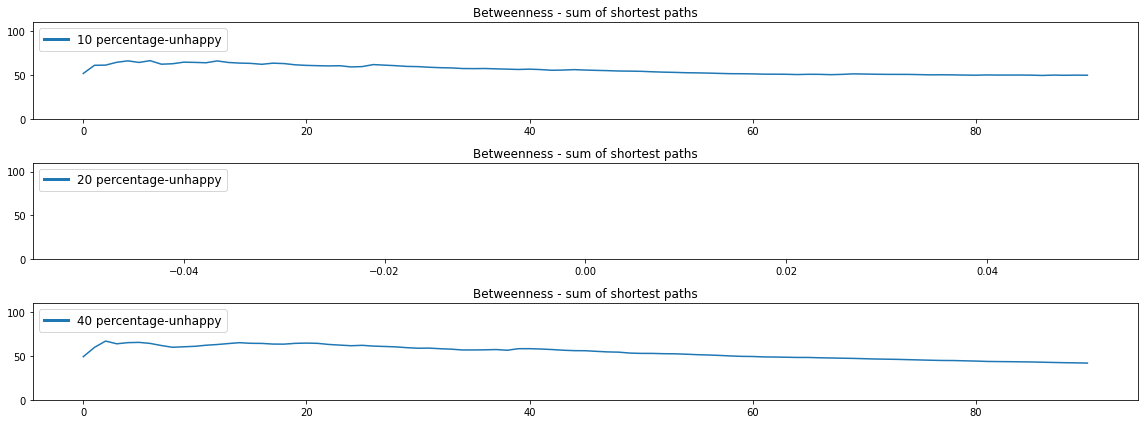

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['betweenness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==5].mean()

In [14]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [15]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,10.9894,0.0
1,mood_providers,4.1276,0.0001
2,cluster_coef,0.7729,0.4406
3,paths,-6.0061,0.0
4,closeness,-5.0399,0.0
5,betweenness,1.8824,0.0614
6,centroid-x,-6.8633,0.0
7,centroid-y,-13.0579,0.0
8,links,-7.7216,0.0
9,total_mood,7.992,0.0


In [16]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,120.7672,0.0
1,mood_providers,17.0371,0.0001
2,cluster_coef,0.5973,0.4406
3,paths,36.0737,0.0
4,closeness,25.4004,0.0
5,betweenness,3.5433,0.0614
6,centroid-x,47.1054,0.0
7,centroid-y,170.5077,0.0
8,links,59.6237,0.0
9,total_mood,63.8727,0.0


In [17]:
df_move.reset_index().columns

Index(['percentage-unhappy', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness', 'centroid-x',
       'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [18]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.3747
mood_providers    0.5197
cluster_coef      0.8122
paths            -0.8768
closeness         0.8264
betweenness       0.4525
total_mood        0.4494
centroid-x       -0.2039
centroid-y       -0.5491
dtype: float64

In [19]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.0380
mood_providers   -0.0519
cluster_coef      0.7983
paths             0.3703
closeness         0.9533
betweenness       0.4592
total_mood        0.9894
centroid-x       -0.4146
centroid-y        0.5330
dtype: float64

In [20]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

(0, 10)

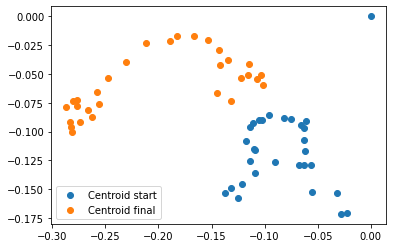

In [21]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

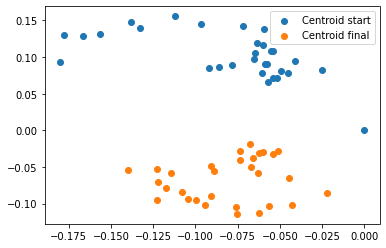

In [22]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [23]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7570          2.7881        0.1870  0.0000   
                   1           2.7448          2.6970        0.2674  0.3380   
                   2           2.8775          2.7927        0.3083  0.5452   
                   3           2.9601          2.9048        0.3317  0.5990   
                   4           2.8941          2.8596        0.3525  0.6740   
...                               ...             ...           ...     ...   
40                 86          2.7700          2.8076        0.4990  1.1565   
                   87          2.7788          2.8447        0.4997  1.1527   
                   88          2.6821          2.7752        0.5008  1.1499   
                   89          2.6735          2.7335        0.5019  1.1475   
                   90          2.8431          2.8724        0.5032  1.1449   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3442      51.8727      0.0000      0.0000   
                   1        0.3410      61.1421     -0.1254     -0.1579   
                   2        0.3320      61.3557     -0.1317     -0.1486   
                   3        0.3342      64.5721     -0.1370     -0.1528   
                   4        0.3399      66.2040     -0.1213     -0.1452   
...                            ...          ...         ...         ...   
40                 86       0.4778      42.7924     -0.1143     -0.0582   
                   87       0.4793      42.5009     -0.1225     -0.0534   
                   88       0.4807      42.2449     -0.0910     -0.0492   
                   89       0.4818      42.0576     -0.0888     -0.0560   
                   90       0.4830      41.8185     -0.0672     -0.0505   

                            links  total_mood  
percentage-unhappy step                        
10                 0      70.8395      5.5451  
                   1      97.9259      5.4419  
                   2     115.9136      5.6702  
                   3     129.8395      5.8650  
                   4     140.5926      5.7537  
...                           ...         ...  
40                 86    646.7160      5.5776  
                   87    651.0247      5.6234  
                   88    655.6296      5.4573  
                   89    659.7901      5.4070  
                   90    664.0988      5.7155  

[182 rows x 10 columns]

/tmp/ipykernel_60255/741047512.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


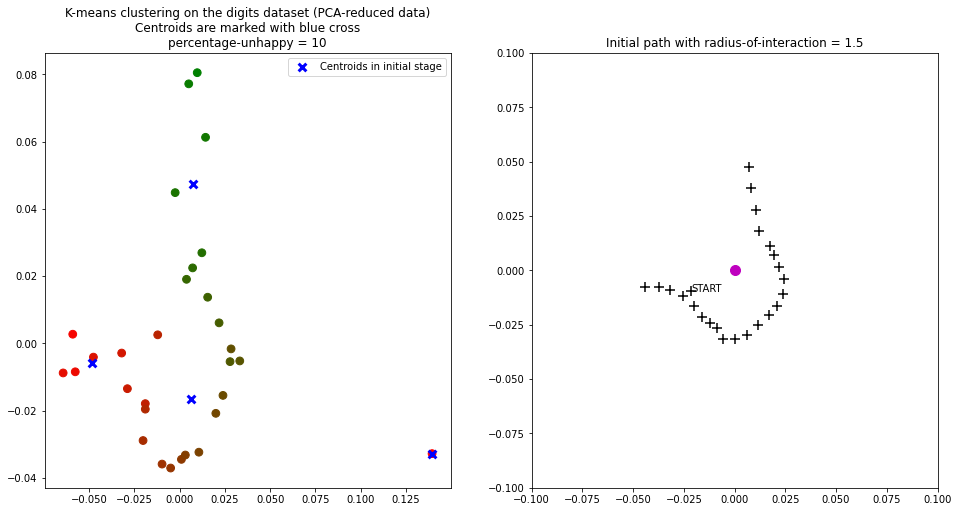

In [24]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [25]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].shape

(0, 12)

/tmp/ipykernel_60255/3037804788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


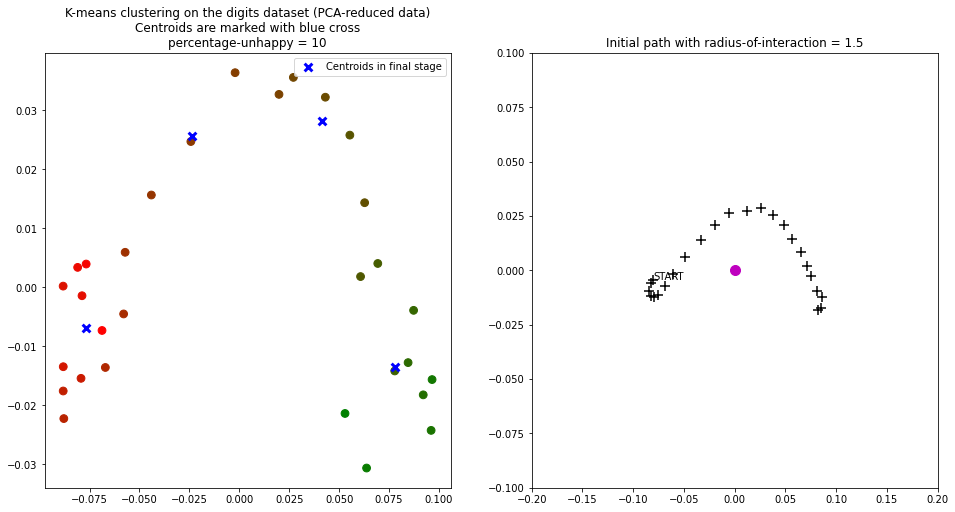

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_60255/1423708788.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


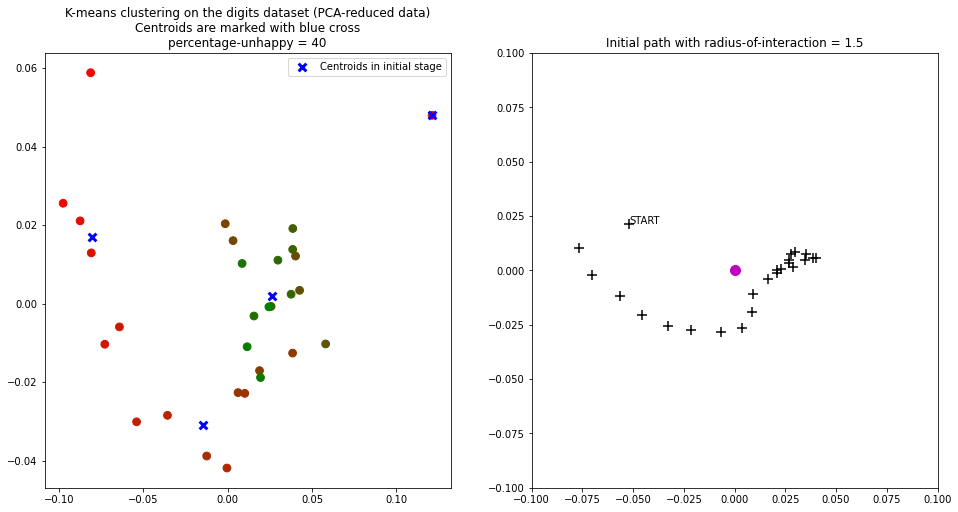

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_60255/2837785209.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


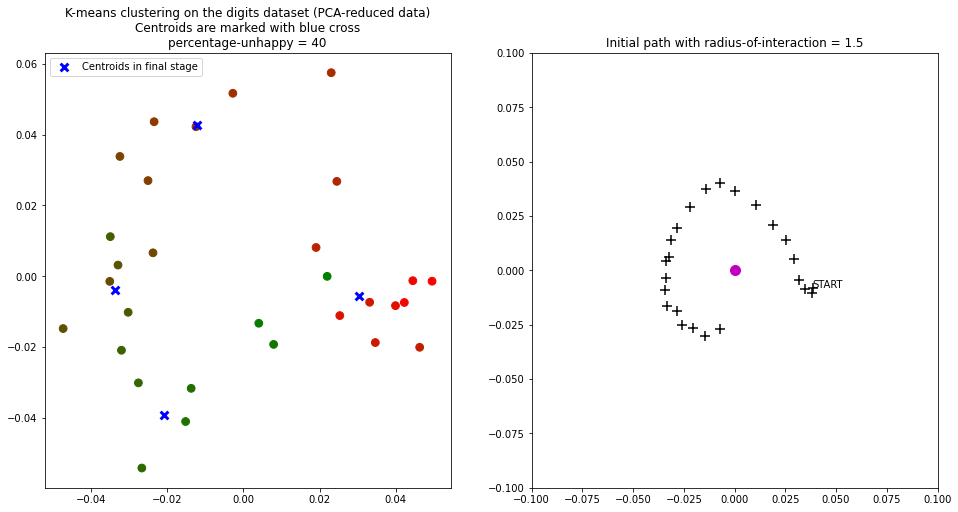

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()